# Optomechanics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

## Going from $n$ to $z$

In [2]:
def Cantor(x, y):
    return (x + y) * (x + y + 1) / 2 + y

In [3]:
# find the bounds 
Nb = 11

In [4]:
na = np.arange(Nb + 1)[np.newaxis, :]
nb = np.arange(Nb + 1)[:, np.newaxis]

z = Cantor(na + nb, na + Nb - nb)
z = z.reshape(-1)
z.sort()

In [5]:
z.min()

66.0

Text(0.5, 0, 'order')

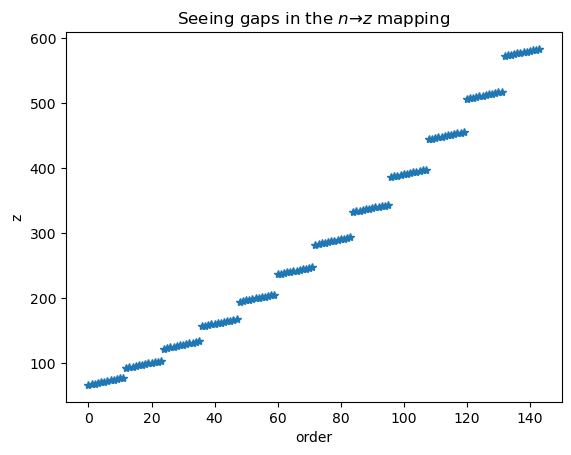

In [6]:
plt.title(r"Seeing gaps in the $n \to z$ mapping")
plt.plot(z, '*')
plt.ylabel("z")
plt.xlabel("order")

## Going from z to n -- Works great! No gaps in $n_a$ and $n_b$

In [7]:
z_min = Cantor(Nb, 0)
z = np.arange(z_min, z_min + 50)

w = np.floor(0.5 * (np.sqrt(8 * z + 1) - 1))
y = z - w * (w + 1) / 2
x = w - y

nb = x.astype(int)

na = (y + nb - Nb).astype(int)

In [8]:
np.unique(na)

array([0, 1, 2, 3])

In [9]:
np.unique(nb)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## System Parameters (in units of wm)


https://github.com/qutip/qutip-notebooks/blob/master/examples/optomechanical-steadystate.ipynb

In [10]:
from qutip import tensor, destroy, qeye

# System Parameters (in units of wm)
#-----------------------------------
Nc = 10                      # Number of cavity states
Nm = 10                     # Number of mech states
kappa = 0.3                 # Cavity damping rate
E = 0.1                     # Driving Amplitude         
g0 = 2.4*kappa              # Coupling strength
Qm = 1e4                    # Mech quality factor
gamma = 1/Qm                # Mech damping rate
n_th = 1                    # Mech bath temperature
delta = -0.43               # Detuning



# Operators
#----------
a = tensor(destroy(Nc), qeye(Nm))
b = tensor(qeye(Nc), destroy(Nm))
num_b = b.dag()*b
num_a = a.dag()*a

# Hamiltonian
#------------
H = -delta * num_a + num_b + g0 * (b.dag() + b) * num_a #+ E*(a.dag()+a)

In [11]:
H.eigenenergies()[:10]

array([-20.90826029, -17.87330797, -14.85043848, -14.44062722,
       -12.32331958, -11.84755274, -10.21541468,  -8.88132379,
        -8.38479787,  -8.12158855])

In [12]:
eigh_tridiagonal(
    -delta * na + nb, g0 * (na * np.sqrt(nb))[1::],
    eigvals_only = True
)[:10]

array([-3.6602446 , -2.04912682, -1.57619869, -0.50039971, -0.42170862,
       -0.21357879,  0.7869795 ,  0.9116    ,  1.        ,  1.67971705])